In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [2]:
#Spotify API credentials from .env
load_dotenv()
client_id = os.getenv('CLIENT_ID')
client_secret = os.getenv('CLIENT_SECRET')

In [3]:
#Initialize Spotify with the credentials
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [4]:
#Search for Eric Prydz's artist IDs under both aliases
pryda = sp.search(q='Pryda', type='artist', limit=1)['artists']['items'][0]
eric_prydz = sp.search(q='Eric Prydz', type='artist', limit=1)['artists']['items'][0]

In [5]:
#Get top tracks of Pryda and Eric Prydz
pryda_top_tracks = sp.artist_top_tracks(pryda['id'], country='US')['tracks']
eric_prydz_top_tracks = sp.artist_top_tracks(eric_prydz['id'], country='US')['tracks']

In [6]:
#Create DataFrames to store track information
pryda_df = pd.DataFrame({
    'Name': [track['name'] for track in pryda_top_tracks],
    'Popularity': [track['popularity'] for track in pryda_top_tracks],
    'Alias': 'Pryda'})

eric_prydz_df = pd.DataFrame({
    'Name': [track['name'] for track in eric_prydz_top_tracks],
    'Popularity': [track['popularity'] for track in eric_prydz_top_tracks],
    'Alias': 'Eric Prydz'})

In [7]:
#Combine the DataFrames
combined_df = pd.concat([pryda_df, eric_prydz_df], ignore_index=True)

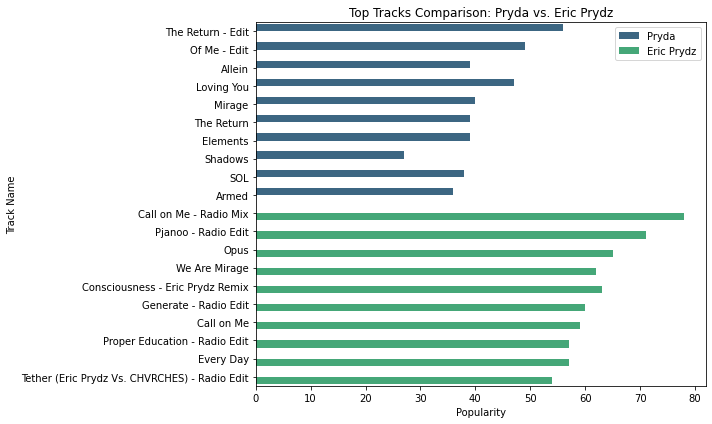

In [8]:
#Plot the popularity of tracks for both aliases
plt.figure(figsize=(10, 6))
sns.barplot(x='Popularity', y='Name', hue='Alias', data=combined_df, palette='viridis')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.title('Top Tracks Comparison: Pryda vs. Eric Prydz')
plt.tight_layout()
plt.legend()
plt.show()